In [1]:
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt

## 과제

In [158]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/_notebooks/HRDataset_v14.csv')
df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


In [167]:
df.groupby(['Sex','Salary']).agg({'Salary':np.mean}).melt(ignore_index = False).reset_index()

,Sex,Salary,variable,value
0,F,45046,Salary,45046.0
1,F,45069,Salary,45069.0
2,F,45395,Salary,45395.0
3,F,45433,Salary,45433.0
4,F,45998,Salary,45998.0
...,...,...,...,...
304,M,140920,Salary,140920.0
305,M,148999,Salary,148999.0
306,M,157000,Salary,157000.0
307,M,170500,Salary,170500.0


In [175]:
data = df.groupby(['Sex']).agg({'Salary':np.mean})\
.stack().reset_index().rename({0:'value'},axis=1)
data

,Sex,level_1,value
0,F,Salary,67786.727273
1,M,Salary,70629.400000


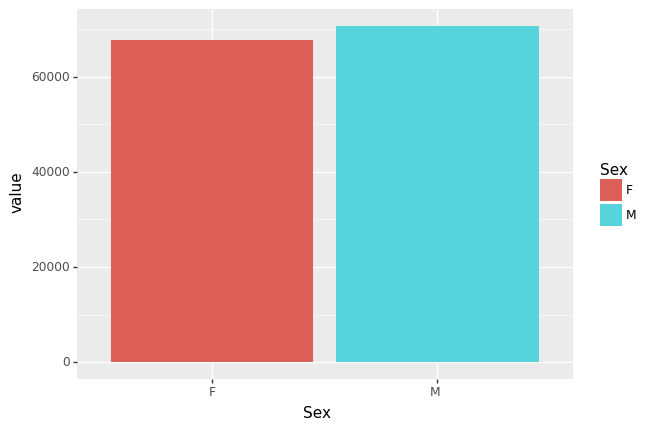

<ggplot: (169469089241)>

In [176]:
ggplot(data) + geom_col(aes(x= 'Sex', y='value',fill='Sex'))

In [181]:
data = df.groupby(['Sex','RaceDesc']).agg({'Salary':np.mean}).melt(ignore_index= False).reset_index()
data

,Sex,RaceDesc,variable,value
0,F,American Indian or Alaska Native,Salary,63436.500000
1,F,Asian,Salary,67520.117647
2,F,Black or African American,Salary,66963.829787
3,F,Two or more races,Salary,58068.500000
4,F,White,Salary,68846.519231
5,M,American Indian or Alaska Native,Salary,70545.000000
6,M,Asian,Salary,69939.416667
7,M,Black or African American,Salary,85066.121212
8,M,Hispanic,Salary,83667.000000
9,M,Two or more races,Salary,62313.800000


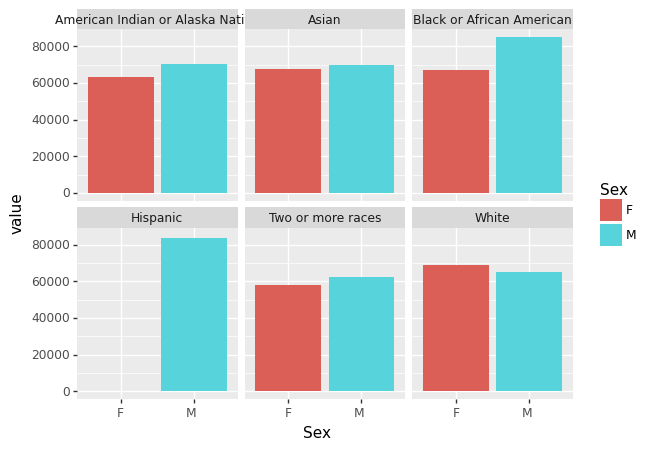

<ggplot: (169469094557)>

In [182]:
ggplot(data) + geom_col(aes(x='Sex',y='value',fill='Sex')) + facet_wrap('RaceDesc')